# Computational Experiments Part 2

In [14]:
import tellurium as te
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Constants
WOLF_MODEL = "../common/Jana_WolfGlycolysis.antimony"

This lecture discusses how to use tellurium simulations to answer science questions.
1. Workflow
   - Articulate the questions to address
   - Select the model
   - Identify parameters and species to manipulate and how they will be modified
     - Changes in initial values
     - Changes in values during simulation
   - Select measures to report
   - Visualize the results
   - Construct codes that encapsulate each step
   - Model debugging

## Wolf Model

What is the final plot?
- x axis: percent change
- y axis: parameter name
- values: color code amount changed

How organize the qualitive values?

In [3]:
WOLF_RR = te.loada(WOLF_MODEL)
START = 0
END = 5
NUMPT = 100  # number of points to simulate
WOLF_DATA = WOLF_RR.simulate(START, END, NUMPT)
print(WOLF_RR.getAntimony())

// Created by libAntimony v2.12.0
model *Jana_WolfGlycolysis()

  // Compartments and Species:
  compartment compartment_;
  species Glucose in compartment_, fructose_1_6_bisphosphate in compartment_;
  species glyceraldehyde_3_phosphate in compartment_, glycerate_3_phosphate in compartment_;
  species pyruvate in compartment_, Acetyladehyde in compartment_, External_acetaldehyde in compartment_;
  species ATP in compartment_, ADP in compartment_, NAD in compartment_, NADH in compartment_;
  species $External_glucose in compartment_, $ethanol in compartment_, $Glycerol in compartment_;
  species $Sink in compartment_;

  // Reactions:
  J0: $External_glucose => Glucose; J0_inputFlux;
  J1: Glucose + 2 ATP => fructose_1_6_bisphosphate + 2 ADP; J1_k1*Glucose*ATP*(1/(1 + (ATP/J1_Ki)^J1_n));
  J2: fructose_1_6_bisphosphate => glyceraldehyde_3_phosphate + glyceraldehyde_3_phosphate; J2_k*fructose_1_6_bisphosphate;
  J3: glyceraldehyde_3_phosphate + NADH => NAD + $Glycerol; J3_k*glyceraldehy

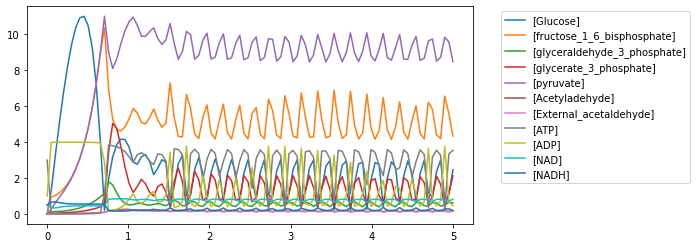

In [4]:
def timePlots(data=WOLF_DATA, title=""):
    fig, ax = plt.subplots(1, figsize=(8, 4))
    p = ax.plot(data[:,0], data[:,1:])
    _ = ax.legend(p, data.colnames[1:], bbox_to_anchor=(1.05, 1), loc='upper left')
    _ = ax.set_title(title)
timePlots()

**Question**: What is the effect of percent changes in each parameter on the amplitude and freuency of glycolytic oscillations?

## Running Simulations for a Range of Change in Parameter Values

In [20]:
parameter = "J1_k1"
changeFracs = [-1, 0, 1]
roadrunner = WOLF_RR

def runExp(parameter, changeFracs):
    """
    Runs experiments and produces plots for the fractional changes in parameter values.

    Parameters
    ----------
    parameter: str
    changeFracs: list-float
        list of fractional change in values
          (smallest value is -1)
    """
    roadrunner = te.loada(WOLF_MODEL)
    baseValue = roadrunner[parameter]
    if not parameter in roadrunner.keys():
        raise ValueError("Unknown parameter name: %s" % parameter)
    for frac in changeFracs:
        roadrunner.resetAll()
        frac = max(frac, -1)
        newValue = baseValue*(1 + frac)
        roadrunner[parameter] = newValue
        data = roadrunner.simulate(START, END, NUMPT)
        pct = int(frac*100)
        title = "%s: %f(%d)" % (parameter, newValue, pct)
        timePlots(data=data, title=title)

/home/ubuntu/SBstoat/sbs/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



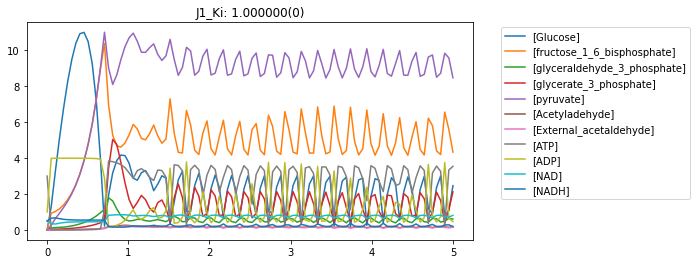

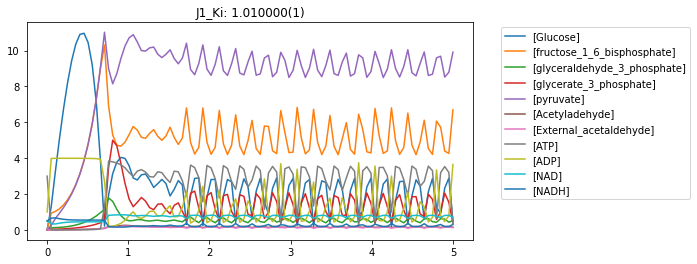

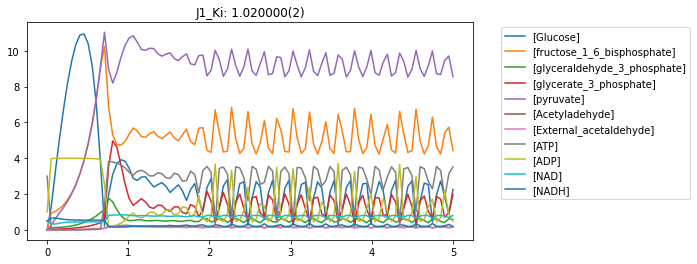

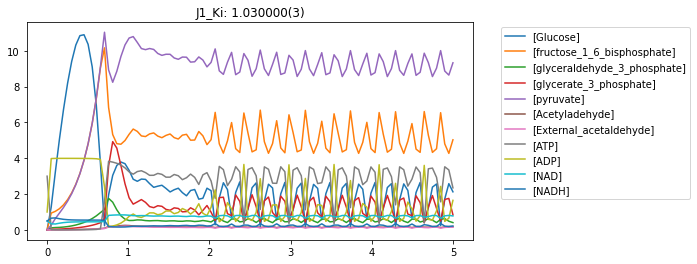

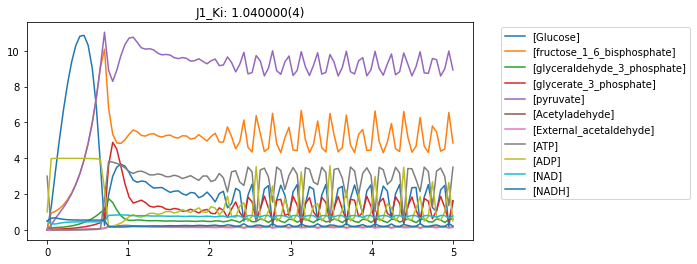

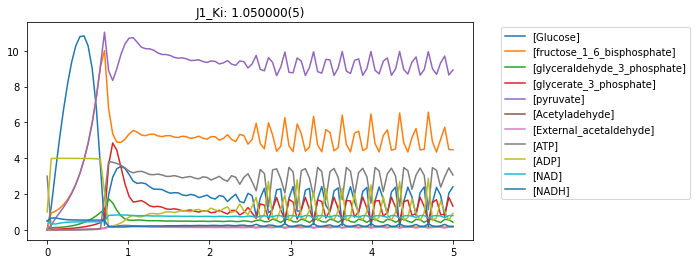

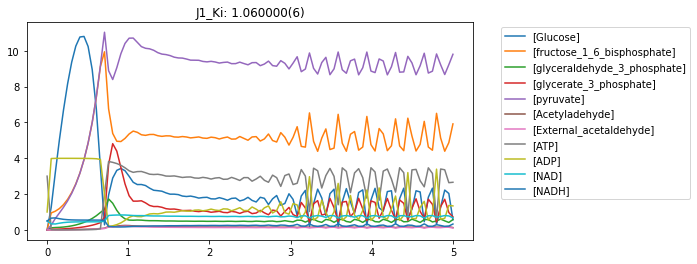

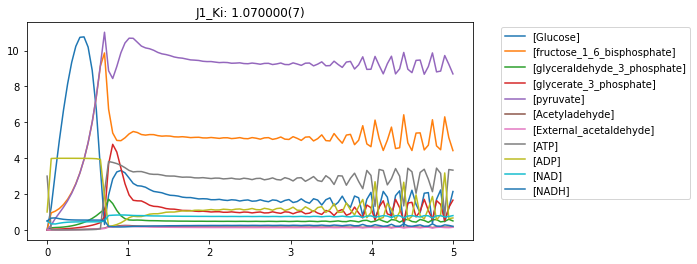

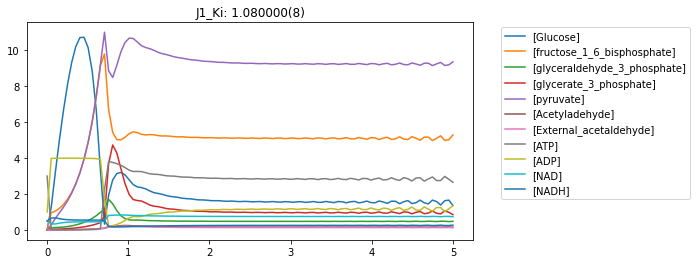

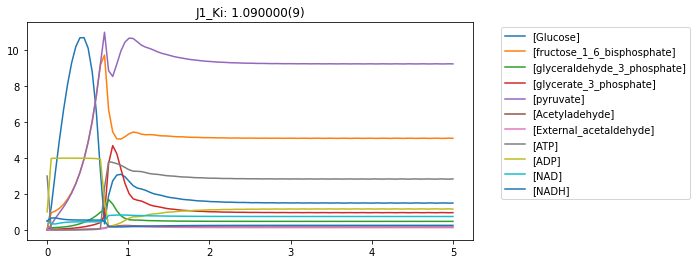

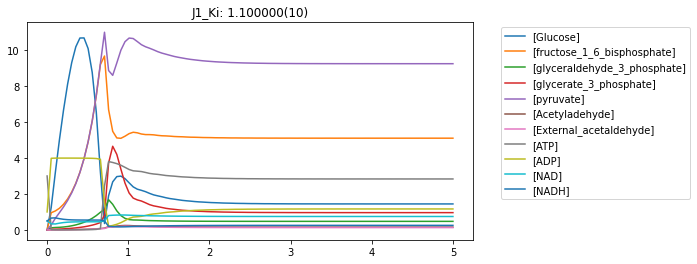

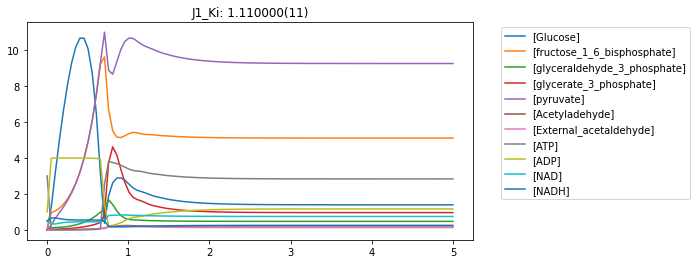

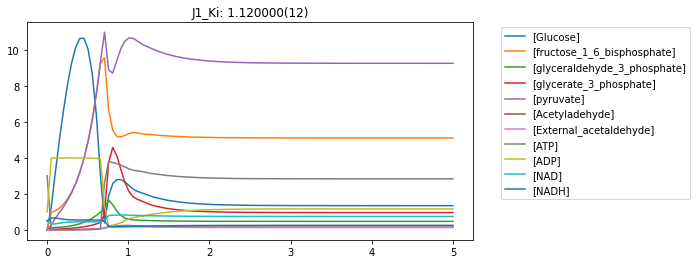

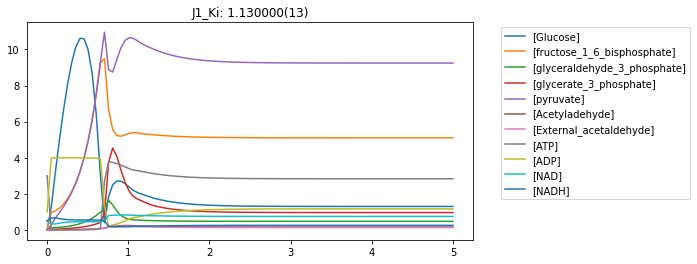

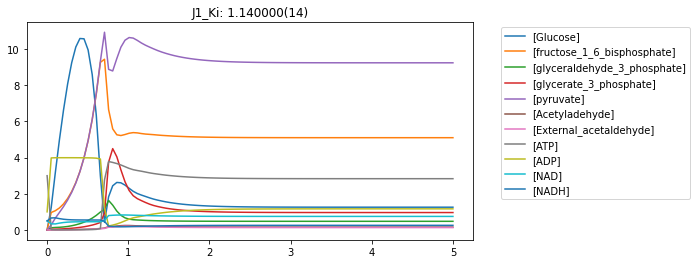

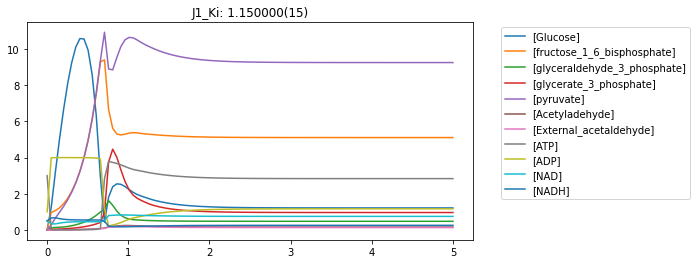

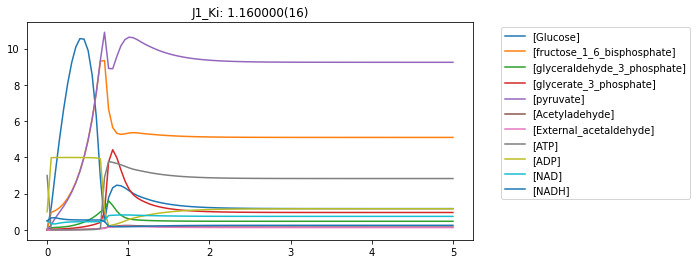

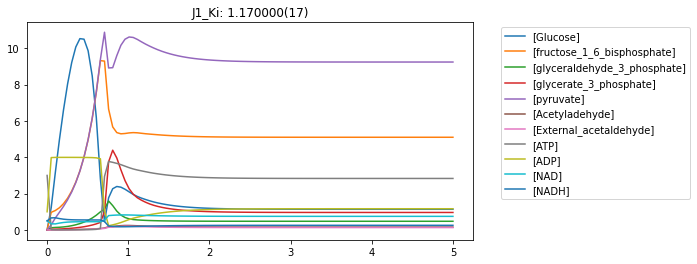

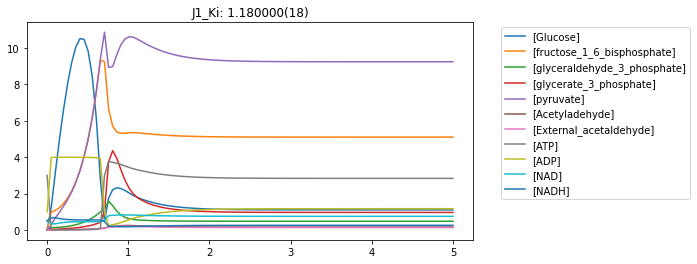

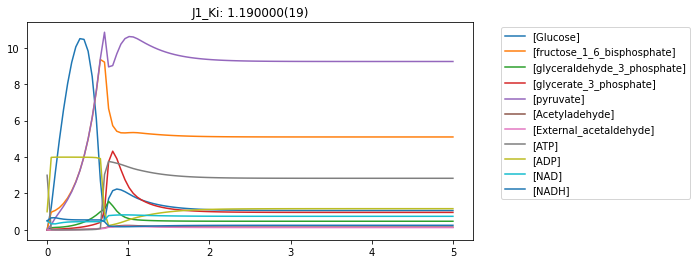

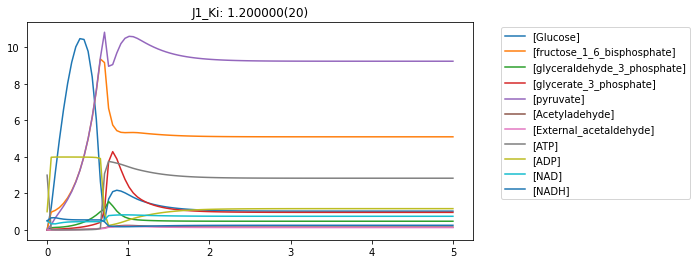

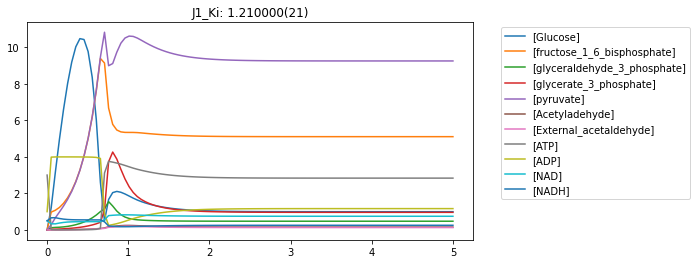

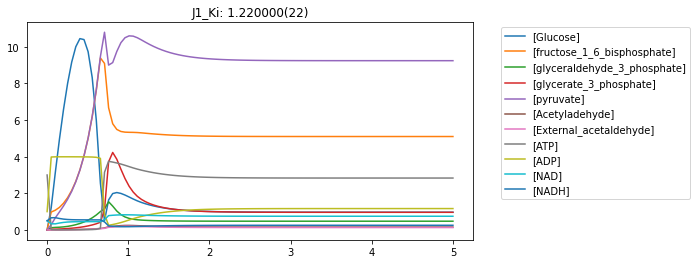

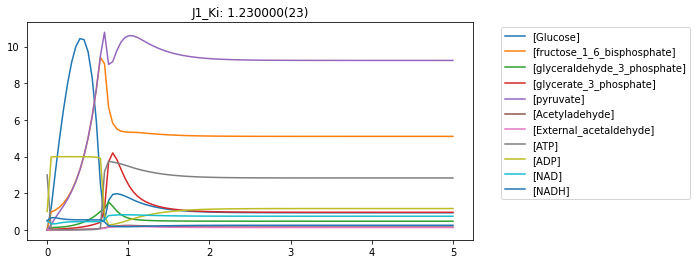

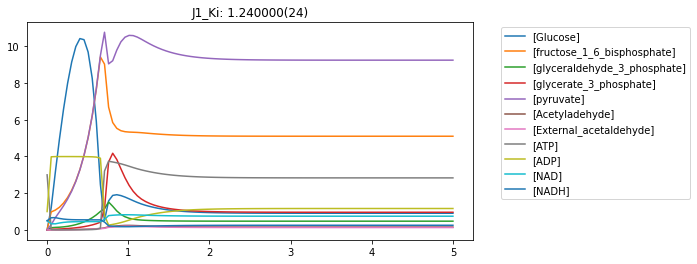

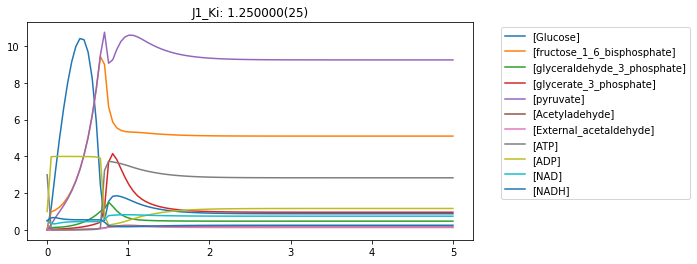

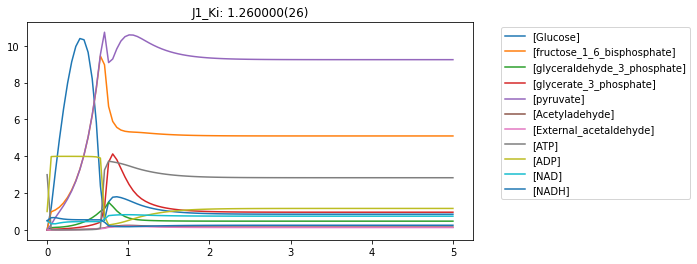

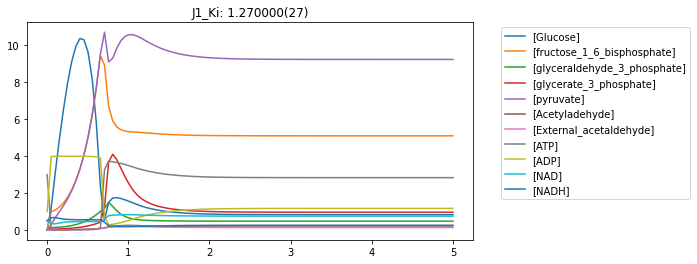

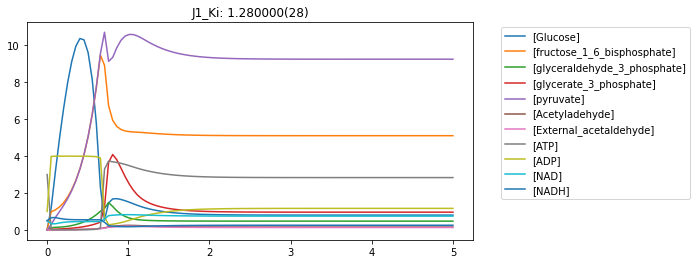

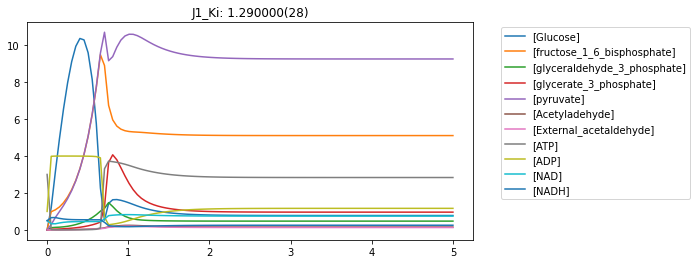

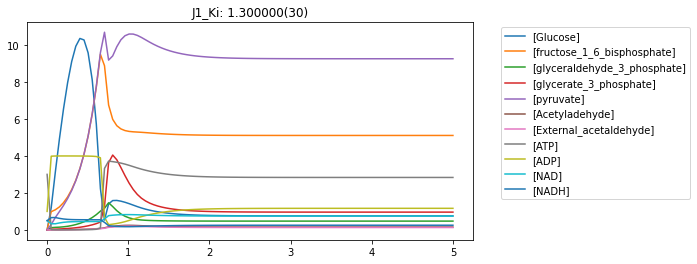

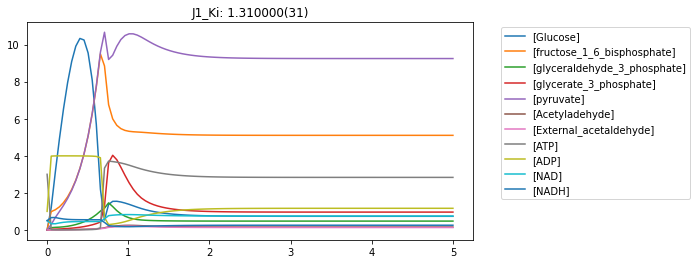

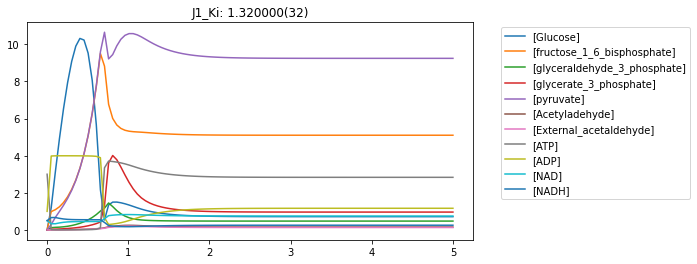

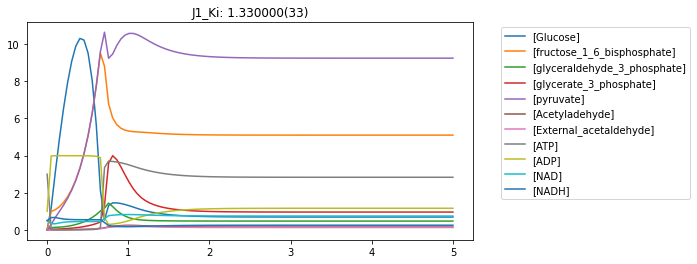

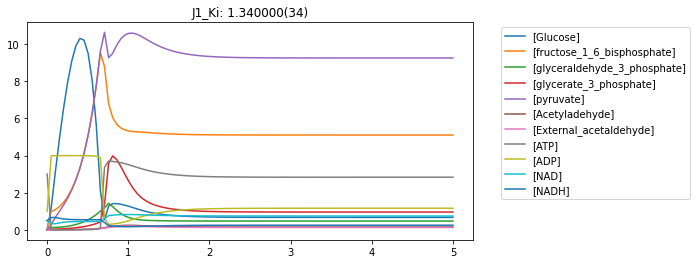

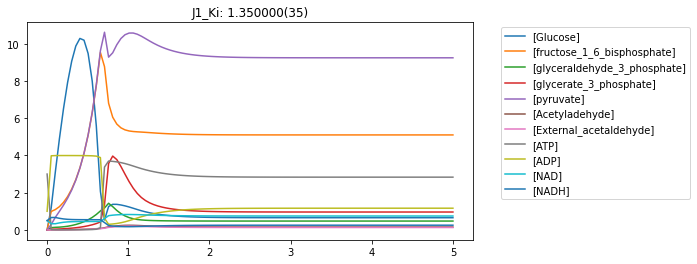

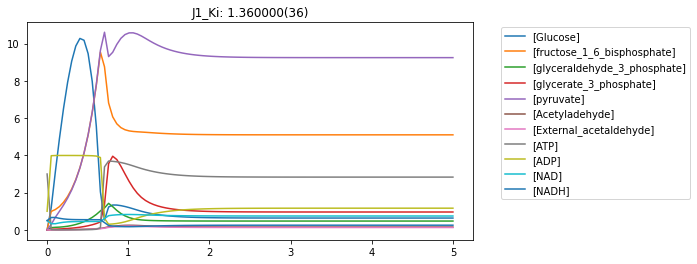

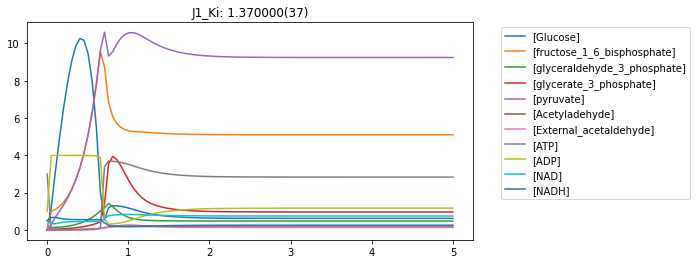

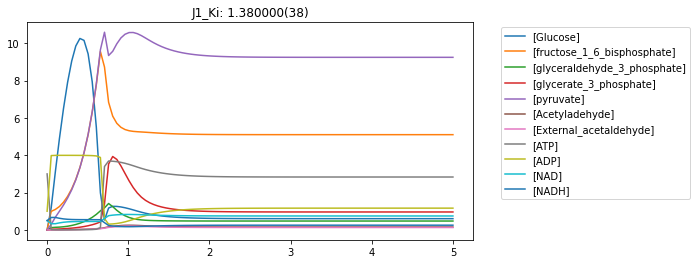

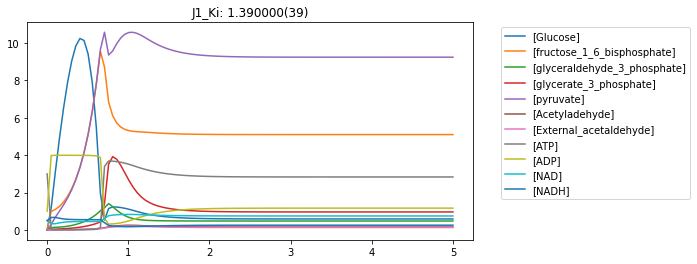

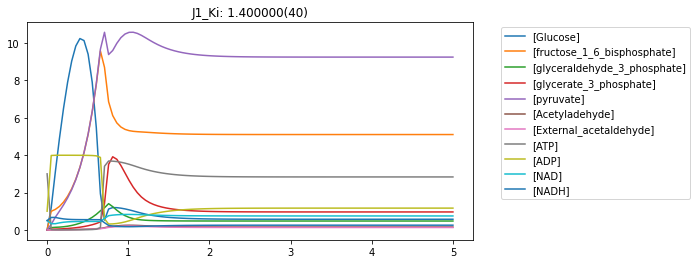

In [35]:
# Experiments 
changes = np.array(range(41))
length = len(changes)
#changes = changes - float((length - 1)/2)
changes = 0.01*changes
runExp("J1_Ki", changes)

In [32]:
changes = np.array(range(21))
length = len(changes)
changes = changes - float((length - 1)/2)

observations
1. J1_Ki: Frequency increases to a straight line. In dynamical systems, this is a bifurcation from a "center" to a stable node.
1. Even for 1 parameter, this is painful to evaluate. Then, we need to transcribe the frequency numbers. Need to report summary of key result, not do a full plot. Also, want to have finer granularity about when the perodicities are extinguished.

## Extracting Frequency Information